In [1]:
# Importing libraries for gathering data and visualization
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override() # use yahoo finance for data

<hr style="border:2px solid #04d9ff">

- The selected stocks are from the Korean stock market (KOSPI, KOSDAQ)
- The theme for the selection focuses on battery suppliers

Investment Portfolio:
|Count|종목명|종목코드|Listing|
|---|---|---|---|
|1|POSCO홀딩스|005490|코스피|
|2|나노신소재|121600|코스닥|
|3|LG화학|051910|코스피|
|4|에코프로비엠|247540|코스닥|
|5|천보|278280|코스닥|
|6|삼성SDI|006400|코스피|
|7|코스모화학|005420|코스피|
|8|엠플러스|259630|코스닥|
|9|에이에프더블류|312610|코스닥|
|10|후성|093370|코스피|


In [2]:
# Gathering data
tickers = {'005490.KS': 'POSCO홀딩스',
 '121600.KQ': '나노신소재',
 '051910.KS': 'LG화학',
 '247540.KQ': '에코프로비엠',
 '278280.KQ': '천보',
 '006400.KS': '삼성SDI',
 '005420.KS': '코스모화학',
 '259630.KQ': '엠플러스',
 '312610.KQ': '에이에프더블류',
 '093370.KS': '후성'}

stock_data = pdr.DataReader(list(tickers.keys()), start='2020-06-01', end='2023-06-01')

[*********************100%***********************]  10 of 10 completed


In [3]:
# Extract adjusted closing price columns for each stock
stock_prices = stock_data[[('Adj Close', s) for s in tickers.keys()]]

In [4]:
stock_prices.columns = stock_prices.columns.droplevel(0)					# Remove multi-index
stock_prices.columns = [tickers[symbol] for symbol in stock_prices.columns] # Rename columns from ticker numbers to company names
stock_prices

,POSCO홀딩스,나노신소재,LG화학,에코프로비엠,천보,삼성SDI,코스모화학,엠플러스,에이에프더블류,후성
Date,,,,,,,,,,
2020-06-01,159678.796875,16748.148438,377598.53125,29663.023438,93605.234375,364181.93750,7768.067383,10474.100586,7100.0,8100.364746
2020-06-02,165365.968750,16349.381836,376645.00000,29439.056641,91509.593750,368162.06250,7724.328613,10474.100586,7000.0,8359.735352
2020-06-03,177177.812500,15900.771484,381889.40625,28344.113281,87118.734375,364181.93750,7698.084961,10052.158203,6825.0,8269.953125
2020-06-04,177615.312500,16698.302734,398099.40625,29289.746094,88116.656250,368659.56250,7925.528320,10052.158203,7000.0,8429.566406
2020-06-05,175427.921875,16449.074219,413832.71875,29488.828125,89813.125000,369654.59375,7864.293457,10027.337891,6800.0,8659.010742
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,371000.000000,134800.000000,720000.00000,246000.000000,190000.000000,714000.00000,53000.000000,11500.000000,4490.0,13240.000000
2023-05-25,365000.000000,133000.000000,712000.00000,243500.000000,186100.000000,700000.00000,50200.000000,11900.000000,4495.0,13050.000000
2023-05-26,360500.000000,131100.000000,706000.00000,238000.000000,184200.000000,693000.00000,49700.000000,11960.000000,4300.0,12990.000000


In [5]:
# Calculate daily returns
stock_returns = stock_prices.pct_change()
stock_returns

,POSCO홀딩스,나노신소재,LG화학,에코프로비엠,천보,삼성SDI,코스모화학,엠플러스,에이에프더블류,후성
Date,,,,,,,,,,
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02,0.035616,-0.023810,-0.002525,-0.007550,-0.022388,0.010929,-0.005631,0.000000,-0.014085,0.032020
2020-06-03,0.071429,-0.027439,0.013924,-0.037194,-0.047983,-0.010811,-0.003398,-0.040284,-0.025000,-0.010740
2020-06-04,0.002469,0.050157,0.042447,0.033363,0.011455,0.012295,0.029545,0.000000,0.025641,0.019300
2020-06-05,-0.012315,-0.014925,0.039521,0.006797,0.019253,0.002699,-0.007726,-0.002469,-0.028571,0.027219
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,-0.015915,-0.002959,0.001391,0.010267,-0.001052,0.005634,0.033138,-0.017933,-0.013187,0.000756
2023-05-25,-0.016173,-0.013353,-0.011111,-0.010163,-0.020526,-0.019608,-0.052830,0.034783,0.001114,-0.014350
2023-05-26,-0.012329,-0.014286,-0.008427,-0.022587,-0.010210,-0.010000,-0.009960,0.005042,-0.043382,-0.004598


<hr style="border:2px solid #04d9ff">

##### Constraints:
- The portlio will invest in all 10 selected stocks
- The weights for each investment will be determined by Sharpe Ratio

$$Sharpe Ratio = \frac{R_s - R_f}{\sigma_s}$$
Where $R_f = Risk\ Free\ Rate$  and we assume it to be 2% for this experiment

In [6]:
# Calculate risk adjusted mean returns for the first 239 days
import math

rf = .02
sample_returns = stock_returns.iloc[1:239]
sharpe = (sample_returns.mean() * 252 - rf) / (sample_returns.std() * math.sqrt(252)) # Sharpe Ratio
sharpe

POSCO홀딩스    2.286117
나노신소재       1.095465
LG화학        1.885391
에코프로비엠      1.008613
천보          1.313734
삼성SDI       1.517868
코스모화학       0.654373
엠플러스        0.684578
에이에프더블류     0.759024
후성          0.623870
dtype: float64

In [7]:
# Initial investment for the portfolio is 10 billion won
initial_investment = 10_000_000_000

# Allocate the initial investment to each stock according to each stock's sharpe ratio
total = sharpe.sum()
allocation_pct = sharpe / total							   # percent allocation
allocation = (initial_investment * allocation_pct).round() # dollar allocation
allocation

POSCO홀딩스    1.932632e+09
나노신소재       9.260815e+08
LG화학        1.593868e+09
에코프로비엠      8.526588e+08
천보          1.110602e+09
삼성SDI       1.283172e+09
코스모화학       5.531921e+08
엠플러스        5.787271e+08
에이에프더블류     6.416617e+08
후성          5.274059e+08
dtype: float64

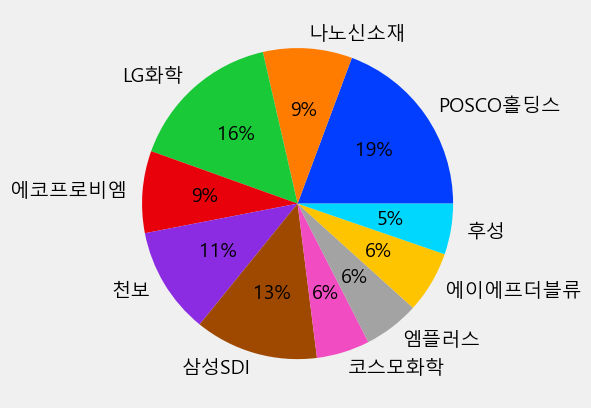

In [14]:
plt.style.use('fivethirtyeight')
np.random.seed(777)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.pie(allocation, labels=allocation.index, colors = sns.color_palette("bright"), autopct='%.0f%%')
plt.show()

<hr style="border:2px solid #04d9ff">

# Estimate 1-day VaRs under 95% and 99% confidence levels 
### Historical Simulation Approach (HSA)


### 1) Basic Approach

In [9]:
# Separate 500 days of data
test_returns = stock_returns.iloc[241:]
test_returns

,POSCO홀딩스,나노신소재,LG화학,에코프로비엠,천보,삼성SDI,코스모화학,엠플러스,에이에프더블류,후성
Date,,,,,,,,,,
2021-05-21,-0.013699,-0.005172,-0.009967,-0.015882,-0.002387,0.011006,-0.017621,0.000000,-0.025773,0.000000
2021-05-24,-0.012500,-0.001733,-0.002237,-0.005764,-0.008373,-0.012442,-0.008969,-0.056478,-0.037037,-0.018000
2021-05-25,0.007032,-0.006944,0.000000,0.010435,0.007238,0.012598,0.009050,-0.014085,-0.010989,0.003055
2021-05-26,-0.025140,-0.006993,-0.067265,0.007458,0.000000,-0.009331,-0.017937,0.017857,0.000000,0.025381
2021-05-27,0.031519,-0.010563,-0.034856,0.012528,-0.003593,-0.001570,0.009132,0.014035,0.001111,-0.012871
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,-0.015915,-0.002959,0.001391,0.010267,-0.001052,0.005634,0.033138,-0.017933,-0.013187,0.000756
2023-05-25,-0.016173,-0.013353,-0.011111,-0.010163,-0.020526,-0.019608,-0.052830,0.034783,0.001114,-0.014350
2023-05-26,-0.012329,-0.014286,-0.008427,-0.022587,-0.010210,-0.010000,-0.009960,0.005042,-0.043382,-0.004598


In [10]:
portfolio_returns = test_returns.dot(allocation)  # Measuring risk, i.e., daily gain or loss of total portfolio for each "scenario"

# Percentile ranked by "descending order"
portfolio_risk = pd.concat([portfolio_returns,(portfolio_returns.rank(pct=True, ascending=False))], axis=1) 
portfolio_risk.columns = ['Losses', 'Rank']
portfolio_risk

,Losses,Rank
Date,,
2021-05-21,-7.550565e+07,0.682
2021-05-24,-1.304126e+08,0.802
2021-05-25,3.167619e+07,0.462
2021-05-26,-1.540889e+08,0.832
2021-05-27,7.352692e+06,0.524
...,...,...
2023-05-24,-1.657513e+07,0.590
2023-05-25,-1.339028e+08,0.806
2023-05-26,-1.267709e+08,0.798


In [11]:
sorted_basic = portfolio_risk.sort_values('Rank', ascending=False)

In [12]:
VaR_95_basic = -int(sorted_basic.iloc[int(.05*len(sorted_basic)-1)]['Losses'])
VaR_99_basic = -int(sorted_basic.iloc[int(.01*len(sorted_basic)-1)]['Losses'])
print(f"1-day Value At Risk (95% confidence level): {VaR_95_basic:,} won")
print(f"1-day Value At Risk (99% confidence level): {VaR_99_basic:,} won")

1-day Value At Risk (95% confidence level): 311,639,992 won
1-day Value At Risk (99% confidence level): 489,127,170 won


### 2) Different Weighting Approach

$$\frac{\lambda^{n-i}(1-\lambda)}{1-\lambda^n}$$

$\lambda$ = weighting scheme, smaller gives more weight to recent data

n = number of data points

i = specific data point

In [13]:
weight_df = pd.DataFrame(columns = ["Days", "Losses"])
weight_df["Losses"] = portfolio_returns
weight_df['Days'] = range(1,501)

lmda = .995
n = weight_df["Days"][-1]
weight_df['Weight'] = ( ( lmda**(n-weight_df["Days"]) * (1-lmda) )/(1-lmda**n)  )
weight_df


,Days,Losses,Weight
Date,,,
2021-05-21,1,-7.550565e+07,0.000446
2021-05-24,2,-1.304126e+08,0.000449
2021-05-25,3,3.167619e+07,0.000451
2021-05-26,4,-1.540889e+08,0.000453
2021-05-27,5,7.352692e+06,0.000455
...,...,...,...
2023-05-24,496,-1.657513e+07,0.005336
2023-05-25,497,-1.339028e+08,0.005363
2023-05-26,498,-1.267709e+08,0.005390
